In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path= '/content/drive/MyDrive/betsentiment-EN-tweets-sentiment-players.csv'
Twitter_Sentiment = pd.read_csv(path,encoding = 'cp1252')

In [4]:
Twitter_Sentiment

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-06-30T19:26:39.099000,1013141786745860099,I vote @BernardoCSilva for @Budweiser #Manofth...,en,NEUTRAL,"{""Neutral"":0.795609652996063232421875,""Negativ..."
1,2018-08-12T14:23:19.240000,1028648126809354240,When is your first match? Didn't see you today...,en,NEUTRAL,"{""Neutral"":0.97318065166473388671875,""Negative..."
2,2018-07-17T10:50:10.393000,1019172399735099393,@Cristiano You never know what you had till it...,en,NEUTRAL,"{""Neutral"":0.9692952632904052734375,""Negative""..."
3,2018-06-08T15:20:06,1005107207652831233,@youngy18 @England You look good man I'd appre...,en,POSITIVE,"{""Neutral"":0.257103621959686279296875,""Negativ..."
4,2018-07-28T17:25:29.664000,1023258152110833664,@LFC @officialAL20 @IntChampionsCup @ManUtd Ex...,en,NEUTRAL,"{""Neutral"":0.584071457386016845703125,""Negativ..."
...,...,...,...,...,...,...
1931331,2018-05-27T22:16:03,1000863228405207046,@beckpla @Tanzeelified @SergioRamos Your mum i...,en,NEGATIVE,"{""Neutral"":0.20010553300380706787109375,""Negat..."
1931332,2018-09-03T08:19:40.680000,1036529142500679680,@Yxdlinn @yedlinny Just get simbas face on you...,en,NEUTRAL,"{""Neutral"":0.598809778690338134765625,""Negativ..."
1931333,2018-08-11T08:59:29.161000,1028204242157404161,@mickyclad @OneLoveMessi10 @SteveGilders @scot...,en,NEUTRAL,"{""Neutral"":0.965048968791961669921875,""Negativ..."
1931334,2018-07-02T15:49:44.440000,1013811970116669440,I vote @willianborges88 for @Budweiser #Manoft...,en,NEUTRAL,"{""Neutral"":0.679902553558349609375,""Negative"":..."


**About The Dataset**  
1."tweet_date_created" - The time and date when the tweet was created  
2."tweet_id" - The id of the tweet by the player  
3."tweet_text" - The tweet by the player  
4."Language" -    language of the tweet    
5."sentiment" - Whether the sentiment is "neutral", "positive", or 
  "negative". 

In [5]:
#Gain information About Dataset
Twitter_Sentiment.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931336 entries, 0 to 1931335
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   tweet_date_created  object
 1   tweet_id            int64 
 2   tweet_text          object
 3   language            object
 4   sentiment           object
 5   sentiment_score     object
dtypes: int64(1), object(5)
memory usage: 88.4+ MB


### Handling Missing Values

In [6]:
Twitter_Sentiment.isnull().sum()

tweet_date_created    0
tweet_id              0
tweet_text            0
language              0
sentiment             0
sentiment_score       0
dtype: int64

In [7]:
Twitter_Sentiment.duplicated().sum()

0

In [8]:
Twitter_Sentiment['sentiment'].value_counts()

NEUTRAL     1309490
POSITIVE     499342
NEGATIVE     109858
MIXED         12646
Name: sentiment, dtype: int64

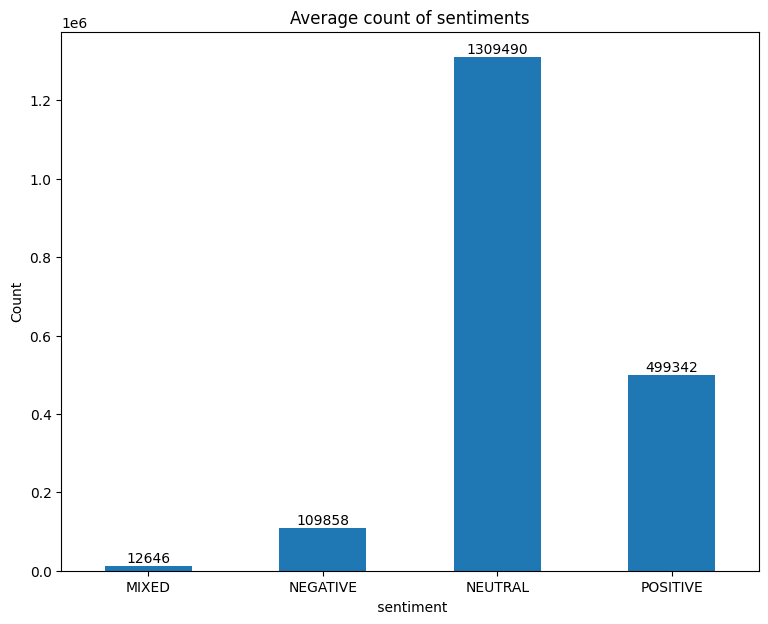

In [9]:
#Plot the Average Count of Sentiment
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(9,7))
plot = Twitter_Sentiment.groupby('sentiment')['sentiment'].count().plot(kind = 'bar')
plt.xlabel(' sentiment')
plt.ylabel('Count')
plt.title('Average count of sentiments')
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

### Drop Named Mixed Rows because confusing the sentiment 

In [11]:
Twitter_Sentiment.drop(Twitter_Sentiment[Twitter_Sentiment['sentiment']=='MIXED'].index,inplace=True)

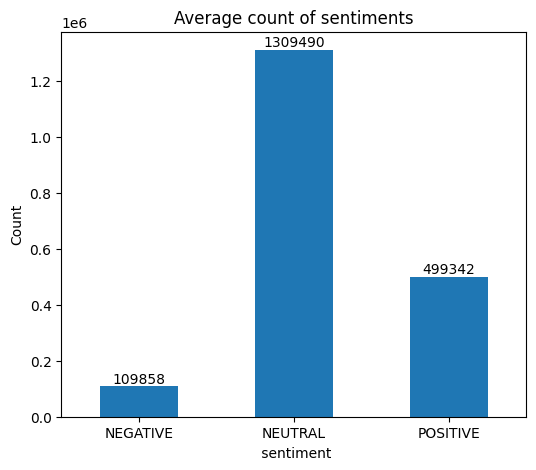

In [12]:
#again plot the diagram for check the previous action
fig, ax = plt.subplots(figsize =(6,5))
plot = Twitter_Sentiment.groupby('sentiment')['sentiment'].count().plot(kind = 'bar')
plt.xlabel(' sentiment')
plt.ylabel('Count')
plt.title('Average count of sentiments')
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

In [13]:
tweet_Sentiment_data = Twitter_Sentiment[['tweet_text','sentiment']]

In [14]:
#Customize stopword as per data
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{"that'll", 'such', 'he', 'ourselves', 'haven', 'your', 'having', 'our', 'are', 'o', 'now', 'both', 'other', 'the', "shouldn't", 'his', "aren't", 'her', 'few', 'so', 'any', 'too', 'to', 'itself', "haven't", 'ain', 'than', 'how', "you're", 'a', 'hasn', 'would', 'in', "isn't", 'with', 'after', "it's", 'again', 'myself', 're', 'll', 'what', 'who', 't', 'will', 'here', 'and', 'shan', 'shall', 'only', 'own', 'ma', 'herself', 'once', 'off', 'might', "shan't", 'their', 'were', 'because', 'up', 'below', 'they', 'before', "you'd", 'as', 'same', 'those', 'whom', 'doing', "doesn't", 'hadn', 'yourself', 'been', "wouldn't", 'which', "should've", 'am', 'didn', "hasn't", 'very', 'its', 'further', 'over', 'by', 'y', 'won', 'yourselves', 'she', 'into', 'some', 'weren', 'couldn', "she's", 'about', 'through', 'ours', 'was', 'an', 'mustn', 'you', 'wasn', 'against', 'we', 'shouldn', 'me', 'when', 'from', 'being', 'aren', 'himself', 'more', "hadn't", "you'll", 'under', 'most', 'above', 'does', 'during', 'wh

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#Customize stopword as per data
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
import re
stop_words = stopwords.words('english')
new_stopwords = ["mario","la","blah","saturday","monday","sunday","morning","evening","friday","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

#remove emoijs in text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = remove_emoji(content)
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)    
    return content

class DataCleaning(BaseEstimator,TransformerMixin):
    def __init__(self):
        print('calling--init--')
    def fit(self,X,y=None):
        print('calling fit')
        return self
    def transform(self, X,y=None):
        print('calling transform')
        X=X.apply(data_cleaning)
        return X

# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [16]:
%%time
pd.options.display.max_colwidth = 10000
#Data cleaning
tweet_Sentiment_data['tweet_text']=tweet_Sentiment_data['tweet_text'].apply(data_cleaning)
tweet_Sentiment_data.head()

CPU times: user 1min 25s, sys: 394 ms, total: 1min 25s
Wall time: 1min 34s


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tweet_text,sentiment
0,vote bernardocsilva budweiser manofthematch urupor tap vote co,NEUTRAL
1,first match not see today alissonbecker,NEUTRAL
2,cristiano never know till gone graciascristiano co,NEUTRAL
3,england look good man appreciate got jersey africa,POSITIVE
4,lfc intchampionscup manutd expect loads excuses tonight game,NEUTRAL


In [17]:
tweet_Sentiment_data['sentiment'] = tweet_Sentiment_data['sentiment'].apply(lambda x: str.lower(x))

<ipython-input-17-37c56a21c4f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['sentiment'] = tweet_Sentiment_data['sentiment'].apply(lambda x: str.lower(x))


In [18]:
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
positive_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "positive"]
negative_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "negative"]
neutral_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "neutral"]

In [ ]:
positive_tweets

,tweet_text,sentiment
3,england look good man appreciate got jersey africa,positive
8,chelseafc cesarazpi fantastic signing worth every single penny,positive
10,doubt hurting fans squad need proud everything achieved worldcup whilst clowns westminster behave like kids restored nations pride brought us together,positive
16,absolute world class performance vote budweiser manofthematch belpan tap vote co fzalqszxvo,positive
17,congratulations chelseafc signing expensive goalkeeper broke week old alissonbecker record better,positive
...,...,...
1931312,england jesselingard getting winnings maguire scoring first england proud boys bring home,positive
1931315,usmnt yedlinny shows fit ready go nufc starting lineup today vs chelseafc get co grpqxgcenh,positive
1931317,congrats marko good luck final support u japan,positive
1931322,nacho making penalty cracking volley golazo outside build beautiful poresp,positive


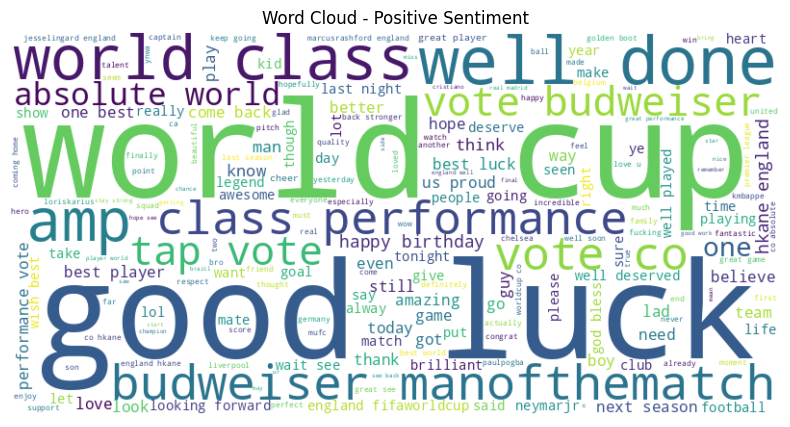

In [19]:
# For example, let's consider all tweets from the positive sentiment category
positive_text = " ".join(positive_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()


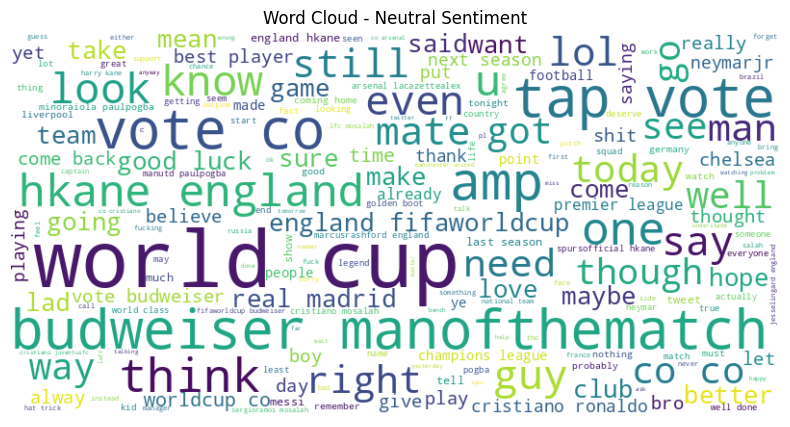

In [20]:
neutral_text = " ".join(neutral_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Sentiment")
plt.show()

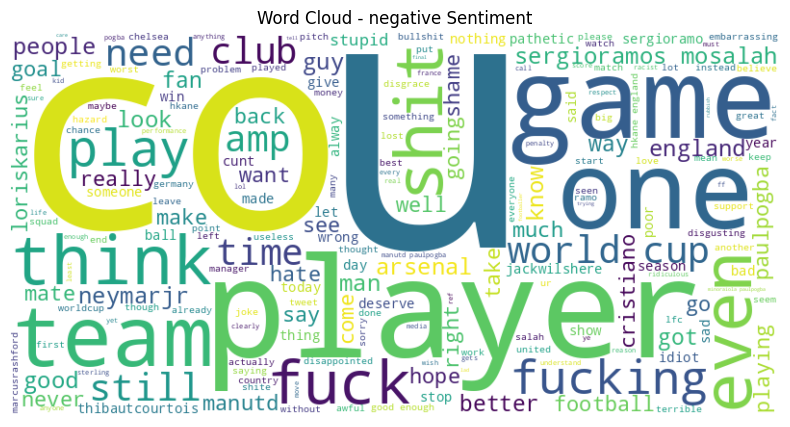

In [21]:
negative_text = " ".join(negative_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - negative Sentiment")
plt.show()


In [23]:
#convert preproceed data to csv file
# saving the dataframe
tweet_Sentiment_data.to_csv('players_tweet_preprocessed_data.csv')